# Introduction

Language identification is the task of automatically determining the language of a given text, essential for applications like machine translation, multilingual document tracking, and enhancing user experiences on electronic devices. This project focuses on developing a model to accurately identify languages, leveraging advanced algorithms and diverse datasets to handle the challenges posed by short texts and similar linguistic patterns.

# LIBRARY REQUIRED:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# data collection:

## Dataset Description

The dataset used for this project is in a CSV format with two primary columns:

* Text: This column contains the input text samples, which can vary in length from single words to complete sentences. The text spans multiple languages, offering a diverse range of linguistic structures and features.

* Language: This column indicates the language label for the corresponding text. Each label represents a unique language, ensuring a supervised learning approach for training the model.

In [ ]:
df = pd.read_csv("/content/LingualSense_dataset[1].csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32336 entries, 0 to 32335
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32336 non-null  object
 1   Language  32336 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB


# data info:

In [ ]:
print("\nFirst Few Rows:")
print(df.head(10))


First Few Rows:
                                                Text  Language
0  Klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
5  エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...  Japanese
6  tsutinalar i̇ngilizce tsuutina kanadada albert...   Turkish
7  müller mox figura centralis circulorum doctoru...     Latin
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu
9  シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...  Japanese


In [ ]:
df.describe()

Text Language
count                                               32336    32336
unique                                              32116       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385

# Check for Missing Values

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Text        0
Language    0
dtype: int64


In [ ]:
 # Handle Missing Values
df['Text'] = df['Text'].fillna("Unknown")
df = df.dropna(subset=['Language'])

# Duplicate in dataset

## Checking for Duplicate

In [ ]:
print("\nDuplicate Entries:")
duplicates = df[df.duplicated()]
duplicates.head(10)


Duplicate Entries:


Text    Language
410   bisby fa roskov yr orrell tm nicolson d paglin...  Indonesian
581   haec commentatio automatice praeparata res ast...       Latin
1012  haec commentatio automatice praeparata res ast...       Latin
1027  bisby fa roskov yr orrell tm nicolson d paglin...  Indonesian
1460  haec commentatio automatice praeparata res ast...       Latin
1594  haec commentatio automatice praeparata res ast...       Latin
1792  இக்கோயில் முதன்மைத் திருக்கோயில் என்ற வகைப்பாட...       Tamil
1878  haec commentatio automatice praeparata res ast...       Latin
2134  haec commentatio automatice praeparata res ast...       Latin
2159  haec commentatio automatice praeparata res ast...       Latin

In [ ]:
print(f"\nDuplicate Count:{len(duplicates)}")


Duplicate Count:212


## Handle Duplicates

In [ ]:
# removing Duplicates
df = df.drop_duplicates()

In [ ]:
print("\nDuplicate Entries:")
duplicates = df[df.duplicated()]
duplicates.head(10)


Duplicate Entries:


Empty DataFrame
Columns: [Text, Language]
Index: []

In [ ]:
print(f"\nDuplicate Count:{len(duplicates)}")


Duplicate Count:0


# Clean Texts:

In [ ]:
def clean_text(text):
    """
    Cleans the input text by:
    - Removing backslashes.
    - Replacing line breaks with a space.
    - Removing numeric characters.
    - Removing special characters and punctuations while preserving alphabetic characters (including Unicode letters) and spaces.
    - Reducing multiple spaces to a single space.
    - Stripping leading and trailing spaces.
    """
    # Keep only alphabetic characters (including non-English Unicode letters) and spaces
    text = re.sub(r'\\', '', text) # Remove blackslashes
    text = re.sub(r'\n', ' ', text) # Remove line breaks with a space
    text = re.sub(r'\d+', ' ', text) # Remove multiple space with a single space
    text = re.sub(r'[^\w\s]', '', text, flags=re.UNICODE)  # Remove special characters and punctuations
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [ ]:
df['Text'] = df['Text'].apply(clean_text)

In [ ]:
print(df.head(10))

                                                Text  Language
0  Klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas på eng the jesuits...   Swedish
2  ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...      Thai
3  வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
5  エノが行きがかりでバスに乗ってしまい気分が悪くなった際に助けるが今すぐバスを降りたいと運転手...  Japanese
6  tsutinalar ingilizce tsuutina kanadada alberta...   Turkish
7  müller mox figura centralis circulorum doctoru...     Latin
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu
9  シャーリーフィールドはサンベルナルドアベニュー沿い市民センターとrtマーティン高校に隣接して...  Japanese


# Convert Text to Lowercase:

In [ ]:
df['Text'] = df['Text'].str.lower()

In [ ]:
print(df.head(10))

                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch
5  エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...  Japanese
6  tsutinalar i̇ngilizce tsuutina kanadada albert...   Turkish
7  müller mox figura centralis circulorum doctoru...     Latin
8  برقی بار electric charge تمام زیرجوہری ذرات کی...      Urdu
9  シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...  Japanese


# EDA

## Number of language

In [ ]:
# 4. number of language
language_counts = df['Language'].value_counts()
print("\nLanguage Counts:", len(language_counts))
print(language_counts)


Language Counts: 30
Language
English       2382
French        1997
Spanish       1810
Russian       1687
Dutch         1538
Arabic        1530
Turkish       1468
Tamil         1445
Hindi         1051
Persian       1000
Thai          1000
Japanese      1000
Urdu          1000
Chinese       1000
Korean        1000
Romanian      1000
Estonian       999
Portugese      997
Pushto         993
Swedish        992
Indonesian     975
Latin          953
Portugeese     736
Italian        694
Sweedish       673
Malayalam      591
German         465
Danish         424
Kannada        366
Greek          358
Name: count, dtype: int64


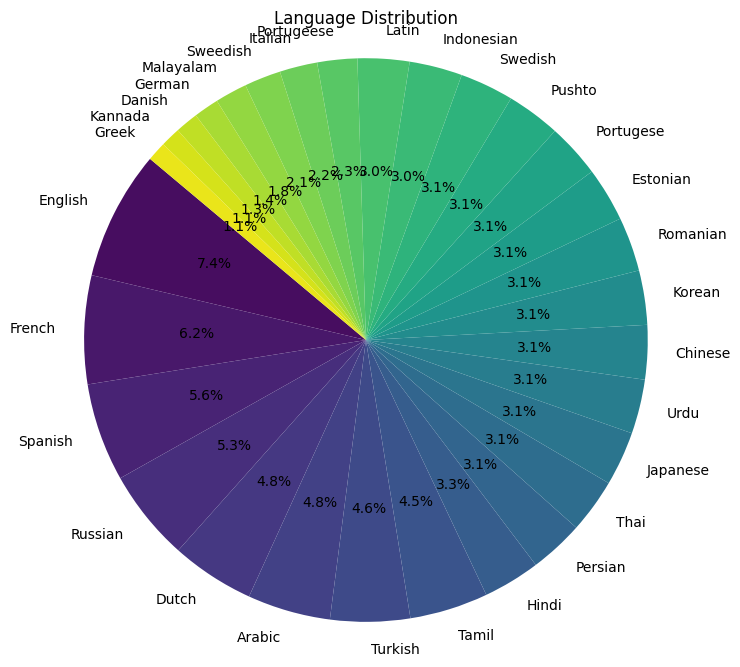

In [ ]:
# Pie Chart for Language Distribution
plt.figure(figsize=(8, 8))
plt.pie(language_counts.values, labels=language_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(language_counts)))
plt.title("Language Distribution")
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

<ipython-input-20-5cd9f3b4e74f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


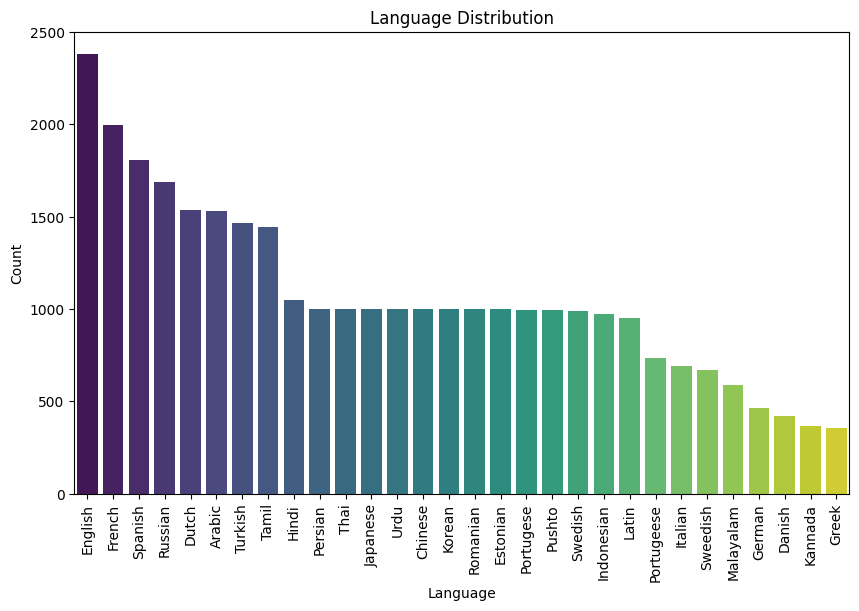

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

## Word Count in Text

In [ ]:
# Word Count in Text
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
print("\nWord Count Statistics:")
print(df['word_count'].describe())


Word Count Statistics:
count    32124.000000
mean        42.518429
std         44.066013
min          0.000000
25%         16.000000
50%         30.000000
75%         55.000000
max       1766.000000
Name: word_count, dtype: float64


In [ ]:
df['word_count'].info()

<class 'pandas.core.series.Series'>
Index: 32124 entries, 0 to 32335
Series name: word_count
Non-Null Count  Dtype
--------------  -----
32124 non-null  int64
dtypes: int64(1)
memory usage: 501.9 KB


In [ ]:
df['word_count'].head(10)

0     45
1     27
2     14
3     28
4     28
5      1
6     21
7     24
8    117
9      1
Name: word_count, dtype: int64

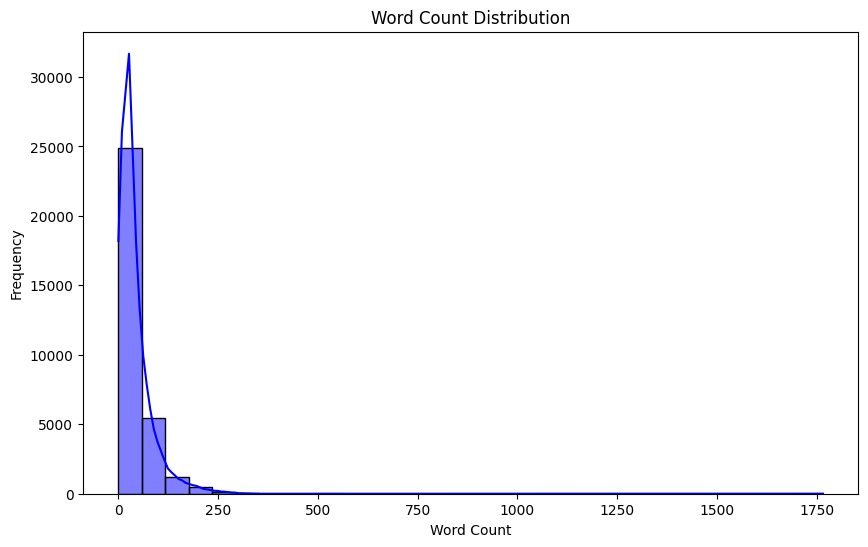

In [ ]:
# Visualize Word Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

## Character Count in Text

In [ ]:
# Character Count in Text
df['char_count'] = df['Text'].apply(lambda x: len(str(x)))
print("\nCharacter Count Statistics:")
print(df['char_count'].describe())


Character Count Statistics:
count    32124.000000
mean       281.961213
std        245.360462
min          1.000000
25%        141.000000
50%        212.000000
75%        356.000000
max       8752.000000
Name: char_count, dtype: float64


<ipython-input-26-7766da0b5a60>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Language', y='char_count', data=df, palette="Set2")


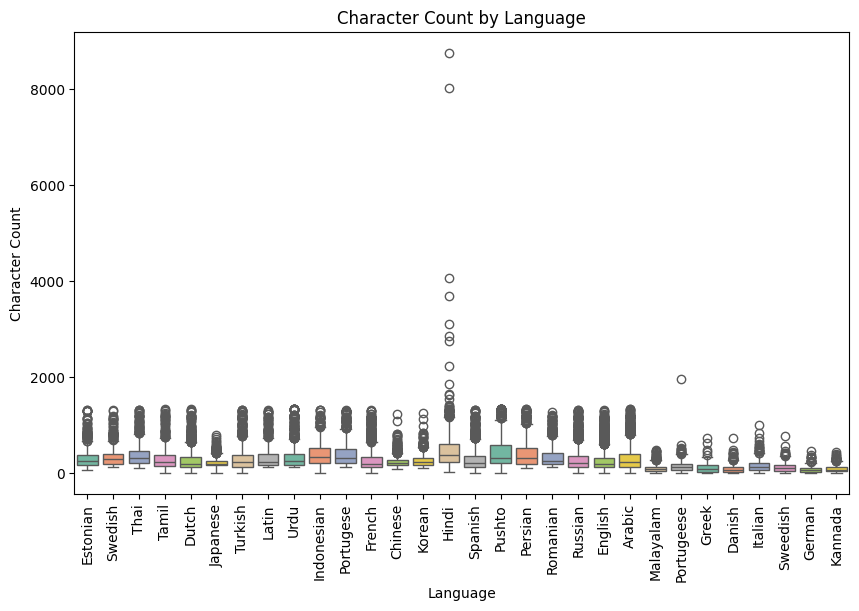

In [ ]:
# Visualize Character Count by Language
plt.figure(figsize=(10, 6))
sns.boxplot(x='Language', y='char_count', data=df, palette="Set2")
plt.title("Character Count by Language")
plt.xlabel("Language")
plt.ylabel("Character Count")
plt.xticks(rotation=90)
plt.show()

## Correlation Analysis for Word Count and Character Count

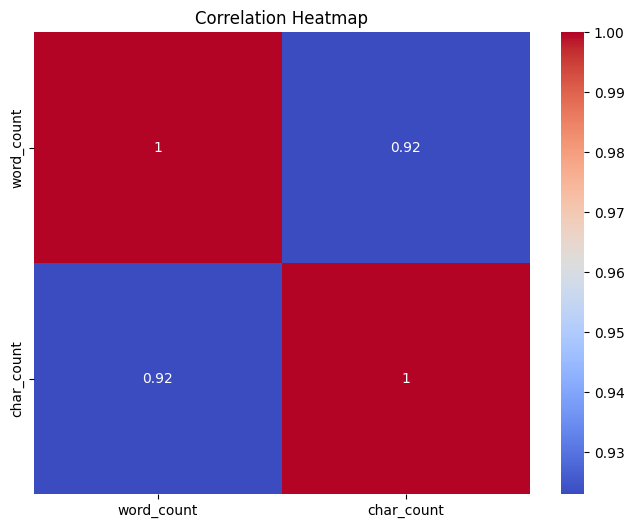

In [ ]:
# Correlation Analysis for Word Count and Character Count
plt.figure(figsize=(8, 6))
sns.heatmap(df[['word_count', 'char_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Label Encoding

Label Encoding is the process of converting categorical data (e.g., text labels) into numerical values, making it suitable for machine learning models.

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the 'language' column
df['language_encoded'] = label_encoder.fit_transform(df['Language'])

# Display the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

# Display the first few rows with the encoded column
print(df[['Language', 'language_encoded']].head(20))

Label Encoding Mapping: {'Arabic': 0, 'Chinese': 1, 'Danish': 2, 'Dutch': 3, 'English': 4, 'Estonian': 5, 'French': 6, 'German': 7, 'Greek': 8, 'Hindi': 9, 'Indonesian': 10, 'Italian': 11, 'Japanese': 12, 'Kannada': 13, 'Korean': 14, 'Latin': 15, 'Malayalam': 16, 'Persian': 17, 'Portugeese': 18, 'Portugese': 19, 'Pushto': 20, 'Romanian': 21, 'Russian': 22, 'Spanish': 23, 'Swedish': 24, 'Sweedish': 25, 'Tamil': 26, 'Thai': 27, 'Turkish': 28, 'Urdu': 29}
      Language  language_encoded
0     Estonian                 5
1      Swedish                24
2         Thai                27
3        Tamil                26
4        Dutch                 3
5     Japanese                12
6      Turkish                28
7        Latin                15
8         Urdu                29
9     Japanese                12
10  Indonesian                10
11   Portugese                19
12      French                 6
13     Chinese                 1
14      Korean                14
15        Thai 

# Train-test split

Features and Labels:

* X: Feature data from the Text column.
* y: Target labels from the language_encoded column.

Train-Test Split:

* test_size=0.2: Reserves 20% of the data for testing, 80% for training.
* random_state=42: Ensures reproducibility.

The print statements display the number of samples in the training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare features and labels
X = df['Text'].values
y = df['language_encoded'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 25699
Test set size: 6425


# Tokenizer, sequence and padding

Tokenization:
* Initializes a Tokenizer with a vocabulary size of 10,000 and an <OOV> token for out-of-vocabulary words.
* fit_on_texts(X_train): Builds a word-to-index mapping based on training data.

Convert Text to Sequences:
* exts_to_sequences: Converts each text into a list of integers using the word index.
* X_train_seq and X_test_seq: Sequences for train and test data.

Pad Sequences:
* Pads/truncates sequences to a fixed max_length=100:
  * padding='post': Adds padding at the end of sequences.
  * truncating='post': Truncates longer sequences at the end.
* Outputs X_train_padded and X_test_padded as uniform-length arrays.
Print Outputs:

Displays sample train/test sequences and their padded versions.

## Tokenizer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize text
vocab_size = 10000  # Adjust based on your dataset
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

print("word index:", tokenizer.word_index)

word index: {'<OOV>': 1, 'de': 2, 'a': 3, 'the': 4, 'en': 5, 'la': 6, 'in': 7, 'د': 8, 'په': 9, 'of': 10, 'के': 11, 'و': 12, 'i': 13, 'et': 14, 'que': 15, 'در': 16, 'में': 17, 'and': 18, 'او': 19, 'o': 20, 'في': 21, 'в': 22, 'e': 23, 'le': 24, 'är': 25, 'به': 26, 'el': 27, 'se': 28, 'un': 29, 'to': 30, 'y': 31, 'کے': 32, 'van': 33, 'از': 34, 'من': 35, 'и': 36, 'میں': 37, 'on': 38, 'की': 39, 'à': 40, 'est': 41, 'is': 42, 'और': 43, 'het': 44, 'کی': 45, 've': 46, 'کې': 47, 'och': 48, 'di': 49, 'da': 50, 'du': 51, 'în': 52, 'है।': 53, 'اور': 54, 'से': 55, 'dan': 56, 'که': 57, 'den': 58, 'por': 59, 'een': 60, 'yang': 61, 'چې': 62, 'em': 63, 'है': 64, 'les': 65, 'का': 66, 'des': 67, 'was': 68, 'para': 69, 'și': 70, 'as': 71, 'سے': 72, 'ja': 73, 'को': 74, 'no': 75, 'do': 76, 'los': 77, 'del': 78, 'این': 79, 'له': 80, 'کا': 81, 'एक': 82, 'bir': 83, 'for': 84, 'على': 85, 'al': 86, 'av': 87, 'med': 88, 'را': 89, 'au': 90, 'ہے': 91, 'на': 92, '—': 93, 'din': 94, '–': 95, 'است': 96, 'wikipedia': 9

## sequences

In [ ]:
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Print the train and test sequences
print("Train sequences:", X_train_seq[:5])
print("Test sequences:", X_test_seq[:5])


Train sequences: [[4698, 1, 1, 1, 1, 1, 1, 1, 1, 7995, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2173, 1150, 1, 1, 1, 1, 1, 1, 1510, 1, 1, 1, 7001, 1, 1, 1, 1, 1, 1, 1654, 4482, 1, 1, 1, 1, 8611, 1, 1, 1, 176, 1, 1, 1, 1, 2101, 3743, 1, 1, 2313, 1, 1, 1, 1, 9366, 1, 1, 1, 6145, 176, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4284, 1, 1, 4483, 4284, 1, 1, 1, 1, 1, 1, 1, 1, 1, 731, 940, 1, 780, 1, 1, 1, 3744, 1, 8611, 1, 3745, 1, 1654, 4482, 1, 176, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3743, 1, 4284, 1, 1, 1], [65, 1, 1, 341, 994, 1, 40, 1268, 5, 287, 1, 67, 1, 2241, 5, 3920, 1, 14, 5, 3920, 1980, 171, 191, 341, 65, 1, 132, 341, 65, 232, 1, 215, 67, 2537, 2, 6, 634, 2241, 5, 8612, 2, 287, 14, 5, 287, 65, 1, 341, 1, 1, 40, 6146, 40, 67, 1, 2, 6, 634, 5, 3110, 8612, 2, 287, 14, 5, 287, 65, 1, 14, 1, 1, 341, 5, 1, 1178, 1, 40, 1268, 5, 287, 215, 29, 9367, 2, 2241, 5, 3920, 5, 287, 14, 5, 3920, 1, 65, 1, 341, 6146, 1036, 8613, 1, 7996, 6, 9368, 2, 1, 1], [794, 1, 341, 1, 130, 1, 4699, 51, 1, 150, 130, 156, 1, 1, 1

## padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Pad sequences
max_length = 100  # Adjust based on text length distribution
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

print("text train padding:", X_train_padded)
print("text test padding:", X_test_padded)

text train padding: [[4698    1    1 ...  940    1  780]
 [  65    1    1 ... 1036 8613    1]
 [ 794    1  341 ...    0    0    0]
 ...
 [   1    1    1 ...    0    0    0]
 [   1  715 1690 ...    0    0    0]
 [   1    1 2100 ...    0    0    0]]
text test padding: [[1724 6306    1 ...    0    0    0]
 [   1    1    1 ...    0    0    0]
 [   1  217 1580 ...    0    0    0]
 ...
 [   1    1    1 ...    0    0    0]
 [   1  524 3921 ...    0    0    0]
 [   1    1    1 ...    0    0    0]]


# model creation

## Prediction function

In [ ]:
import numpy as np

def predict_language(input_text, model, tokenizer, label_encoder, max_length=100):
    """
    Predict the language of the given input text.

    Parameters:
        input_text (str): The text to classify.
        model (tf.keras.Model): The trained model.
        tokenizer (Tokenizer): The tokenizer used during training.
        label_encoder (LabelEncoder): The label encoder used for encoding classes.
        max_length (int): The maximum length for padding sequences.

    Returns:
        str: Predicted language label.
    """
    # Preprocess the input text
    input_sequence = tokenizer.texts_to_sequences([input_text])  # Tokenize the text
    input_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post', truncating='post')  # Pad the sequence

    # Predict the language
    predictions = model.predict(input_padded)  # Model prediction
    predicted_class = np.argmax(predictions, axis=1)  # Get the class with the highest probability

    # Decode the predicted class
    predicted_label = label_encoder.inverse_transform(predicted_class)
    return predicted_label[0]


## Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

num_languages = len(language_counts) # Ensure it's the number of unique classes

# Define the model
model = Sequential([
    # Embedding layer: Converts text to dense vector representation
    Embedding(input_dim=10000, output_dim=64, input_length=100),

    # Flatten layer: Flattens the embeddings into a single vector
    Flatten(),

    # Dense layer: Fully connected layer for intermediate processing
    Dense(32, activation='relu'),

    # Output layer: Predicts the language (num_languages = number of unique classes)
    Dense(num_languages, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.4311 - loss: 2.0996 - val_accuracy: 0.9002 - val_loss: 0.3994
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9141 - loss: 0.3126 - val_accuracy: 0.9024 - val_loss: 0.3407
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9344 - loss: 0.2221 - val_accuracy: 0.9175 - val_loss: 0.2844
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9404 - loss: 0.1846 - val_accuracy: 0.9091 - val_loss: 0.2981
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9470 - loss: 0.1625 - val_accuracy: 0.9088 - val_loss: 0.3001
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9514 - loss: 0.1467 - val_accuracy: 0.9130 - val_loss: 0.3040
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9519 - loss: 0.1416 - val_accuracy: 0.9166 - val_loss: 0.2953
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9537 - loss: 0.1341 - val

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 64)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │         204,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 30)                  │             990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,537,468 (9.68 MB)

 Trainable params: 845,822 (3.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,691,646 (6.45 MB)

In [ ]:
# Example usage
custom_text = "I quite like him.  I'm so in love with him and my heart flutters when I see him."  # Replace with your custom input
predicted_language = predict_language(custom_text, model, tokenizer, label_encoder)
print(f"The predicted language for '{custom_text}' is: {predicted_language}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The predicted language for 'I quite like him.  I'm so in love with him and my heart flutters when I see him.' is: English


## NLP

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode labels into integers
num_languages = len(set(y_train))   # Number of unique languages

# Step 2: Tokenize and pad the sequences (texts)
vocab_size = 10000  # Vocabulary size
max_length = 20  # Max sequence length (adjustable)
# Step 4: Build the model
nlp_model = Sequential([
    # Embedding layer: Converts words into dense vectors
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),

    # Flatten layer: Flattens the 2D output of Embedding layer into a 1D vector
    Flatten(),

    # Fully connected layer: Adds non-linearity
    Dense(32, activation='relu'),

    # Dropout layer: Helps to reduce overfitting
    Dropout(0.2),

    # Output layer: softmax activation for multi-class classification
    Dense(num_languages, activation='softmax')
])

# Step 5: Compile the model
nlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = nlp_model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=2)

# Step 7: Evaluate the model
loss, accuracy = nlp_model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


12850/12850 ━━━━━━━━━━━━━━━━━━━━ 128s 10ms/step - accuracy: 0.6133 - loss: 1.3923 - val_accuracy: 0.9018 - val_loss: 0.3480
Epoch 2/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 138s 10ms/step - accuracy: 0.9041 - loss: 0.3115 - val_accuracy: 0.8998 - val_loss: 0.3406
Epoch 3/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 125s 10ms/step - accuracy: 0.9188 - loss: 0.2517 - val_accuracy: 0.9055 - val_loss: 0.3612
Epoch 4/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 143s 10ms/step - accuracy: 0.9268 - loss: 0.2231 - val_accuracy: 0.9086 - val_loss: 0.3773
Epoch 5/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 138s 10ms/step - accuracy: 0.9299 - loss: 0.2195 - val_accuracy: 0.9016 - val_loss: 0.4057
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8984 - loss: 0.4178
Test Loss: 0.4057, Test Accuracy: 0.9016


In [ ]:
# Example usage
custom_text = "I quite like him.  I'm so in love with him and my heart flutters when I see him."  # Replace with your custom input
predicted_language = predict_language(custom_text, nlp_model, tokenizer, label_encoder)
print(f"The predicted language for '{custom_text}' is: {predicted_language}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The predicted language for 'I quite like him.  I'm so in love with him and my heart flutters when I see him.' is: English


## GRU

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode labels into integers
num_languages = len(language_counts)   # Number of unique languages

# Step 2: Tokenize and pad the sequences (texts)
vocab_size = 10000  # Vocabulary size
max_length = 20  # Max sequence length (adjustable)

# Step 4: Build the model with GRU
gru_model = Sequential([
    # Embedding layer: Converts words into dense vectors
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),

    # GRU layer: Captures sequential dependencies
    GRU(64, activation='tanh', return_sequences=False),  # 64 units, no return_sequences for final output

    # Dropout layer: Helps to reduce overfitting
    Dropout(0.2),

    # Fully connected layer: Adds non-linearity
    Dense(32, activation='relu'),

    # Output layer: softmax activation for multi-class classification
    Dense(num_languages, activation='softmax')
])

# Step 5: Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = gru_model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=2)

# Step 7: Evaluate the model
loss, accuracy = gru_model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


12850/12850 ━━━━━━━━━━━━━━━━━━━━ 699s 54ms/step - accuracy: 0.3195 - loss: 2.3714 - val_accuracy: 0.8998 - val_loss: 0.3629
Epoch 2/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 682s 53ms/step - accuracy: 0.9097 - loss: 0.3079 - val_accuracy: 0.9152 - val_loss: 0.2928
Epoch 3/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 740s 53ms/step - accuracy: 0.9307 - loss: 0.2230 - val_accuracy: 0.9146 - val_loss: 0.2981
Epoch 4/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 693s 54ms/step - accuracy: 0.9353 - loss: 0.1939 - val_accuracy: 0.9108 - val_loss: 0.3374
Epoch 5/5
12850/12850 ━━━━━━━━━━━━━━━━━━━━ 708s 55ms/step - accuracy: 0.9397 - loss: 0.1819 - val_accuracy: 0.9108 - val_loss: 0.3656
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9094 - loss: 0.3686
Test Loss: 0.3656, Test Accuracy: 0.9108


In [ ]:
# Example usage
custom_text = "你好，欢迎使用文本分类器！."  # Replace with your custom input
predicted_language = predict_language(custom_text, gru_model, tokenizer, label_encoder)
print(f"The predicted language for '{custom_text}' is: {predicted_language}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
The predicted language for '你好，欢迎使用文本分类器！.' is: Japanese
